In [2]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [8]:
dat_fiber, param_fiber = loadData('../normE_fiber2.dat')
dat, param_list = loadData('../normE_all13.dat')

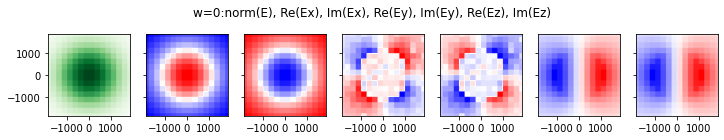

In [192]:
plotComplexData(dat_fiber, range(4), bound=2000)

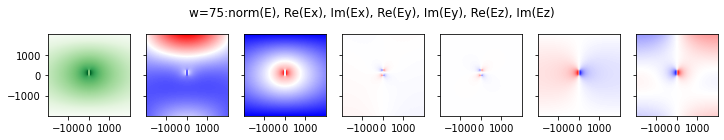

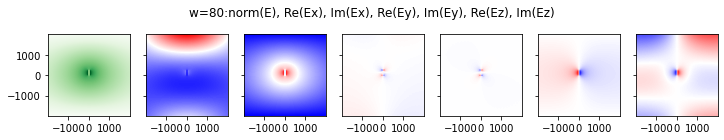

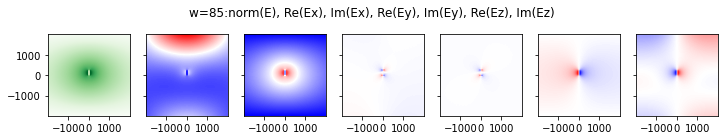

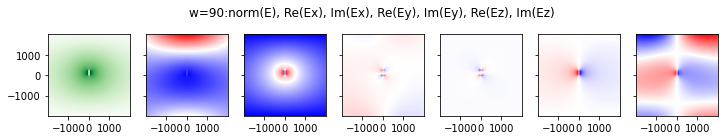

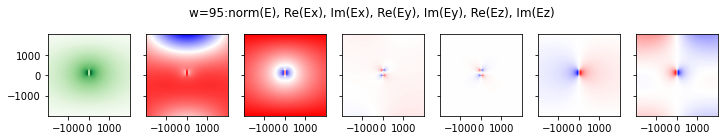

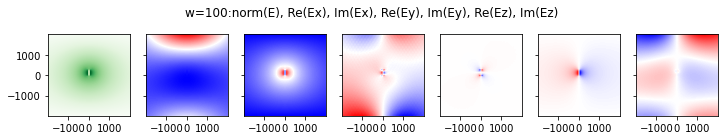

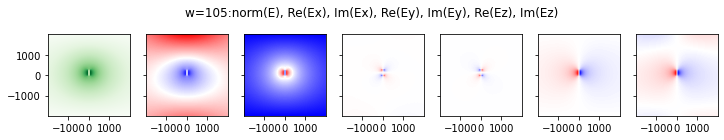

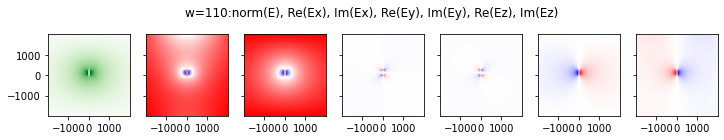

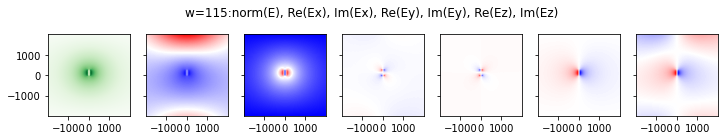

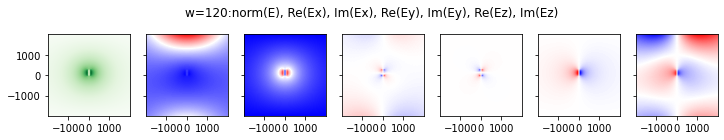

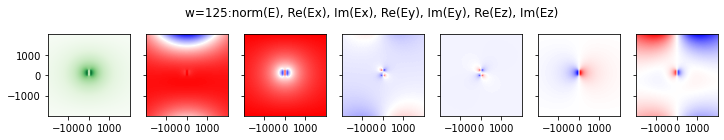

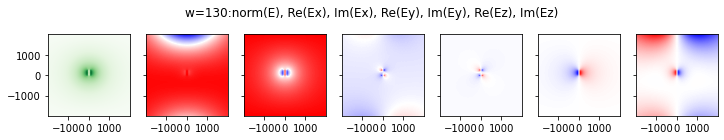

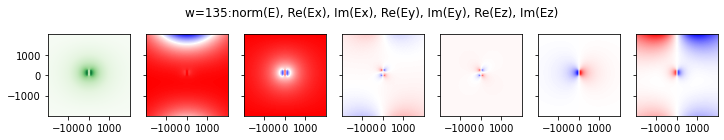

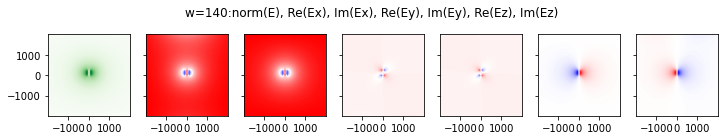

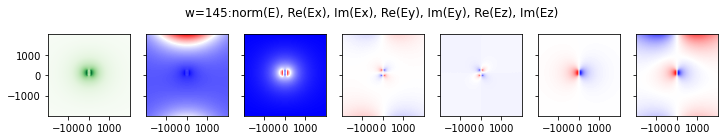

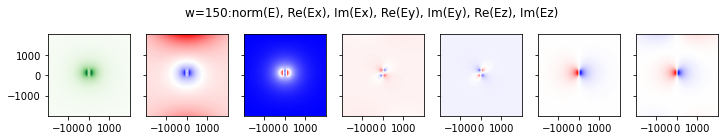

In [193]:
plotComplexData(dat, param_list, bound=2000)

In [5]:
def dattoxyComplex(dat, n_param, n_dim = 3):
    
    x = np.real(dat[:, 0]); y = np.real(dat[:, 1])

    (m,n)   = np.shape(dat)
    z = np.reshape(dat[:,2:],(m,n_param,n_dim+1))

    return x, y, z

def getComplexCorrelation(E_ref, E_i, i):

        xc = 0j*np.zeros(np.shape(E_ref[:,:,0,1]))

        norm_factor = np.sum(E_ref[:,:,0,0]**2)*np.sum(E_i[:,:,i,0]**2)

        for j in [1,2,3]:
            xc_j = signal.correlate2d(
                np.conj(E_ref[:,:,0,j]), E_i[:,:,i,j]
                , mode="same", boundary='wrap')
            xc += np.abs(xc_j)**2/norm_factor
            print(j, np.max(np.abs(xc_j)**2/norm_factor))
        return np.real(xc)


def checkNorm(E):

    norm_compute = np.abs()


def plotCorrvsparams(param_list, xcpeaks, xcpeaks2 =[]):
    param_list = np.array(param_list, dtype=float)
    plt.plot(param_list, xcpeaks, marker='o', linestyle='', label = "fit")
    if xcpeaks2:  
        plt.plot(param_list, xcpeaks2, marker='o', linestyle='', label = "max")  
    plt.locator_params(axis="x", nbins=4)
    plt.ylabel("peak correlation")
    plt.legend()
    plt.xlabel("width (nm)")
    plt.show()

def convolveComplex1(dat_ref, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0):

    param_list = np.unique(np.array(param_list,dtype=float))

    xref, yref, zref = dattoxyComplex(dat_ref, 1)
    values_ref, corners_ref = cropData(xref, yref, zref, bound,scale,res)   
    #values dimension: (res, res, 1, 3)

    n_param = len(param_list); xclist = []; xcpeaks1 = []; xcpeaks2 = []

    x, y, z   = dattoxyComplex(dat, n_param)
    values, corners = cropData(x, y, z, bound, scale, res)
    #values dimension: (res, res, n_param, 3)

    for i in range(n_param):
               
        xc_norm = getComplexCorrelation(values_ref, values, i)

        normpeak1, xcfit = fitCorrelation(xc_norm)
        
        xclist.append(xc_norm)
        xcpeaks1.append(normpeak1)
        xcpeaks2.append(np.max(xc_norm))

        if plotflag1:
            plotCorr2D(xc_norm, corners, fitflag, xcfit = xcfit)

    if plotflag2:
        plotCorrvsparams(param_list, xcpeaks1, xcpeaks2)

1 (0.9743286777733909+0j)
2 (2.3066951356845063e-09+0j)
3 (1.1905738398786468e-05+0j)


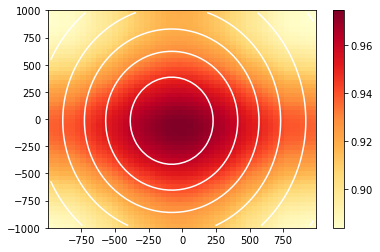

1 (0.9702921950476593+0j)
2 (2.874901468979948e-09+0j)
3 (1.4558034213771346e-05+0j)


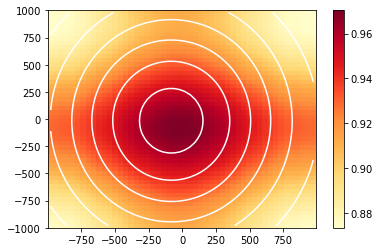

1 (0.9650493079618786+0j)
2 (3.4672392514893477e-09+0j)
3 (1.775716736048673e-05+0j)


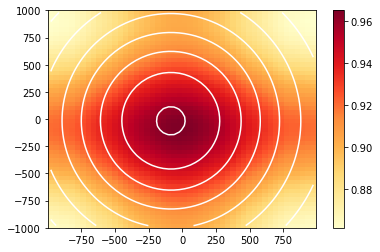

1 (0.9582983980771032+0j)
2 (4.247749048728817e-09+0j)
3 (2.173964390051158e-05+0j)


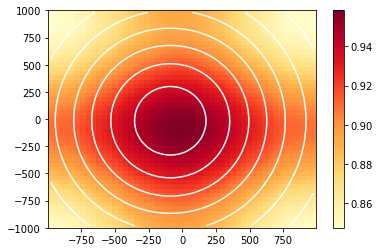

1 (0.9497857220492498+0j)
2 (5.648104600335487e-09+0j)
3 (2.646775174054066e-05+0j)


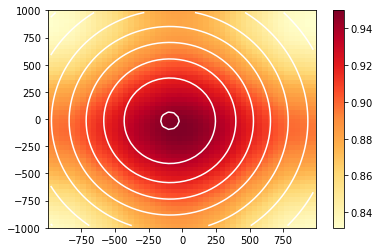

1 (0.9388557400342559+0j)
2 (6.744570753918359e-09+0j)
3 (3.242140767961254e-05+0j)


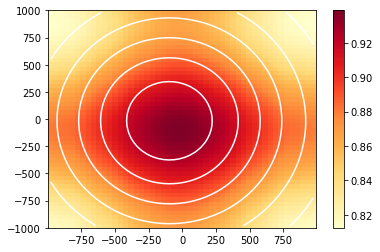

1 (0.9252848189757629+0j)
2 (7.993976989366479e-09+0j)
3 (3.9366041020218074e-05+0j)


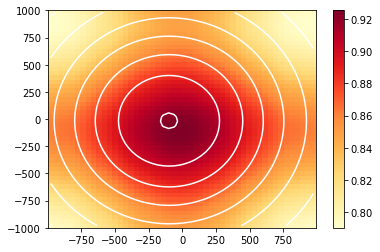

1 (0.9088793993766244+0j)
2 (9.985774715884573e-09+0j)
3 (4.77145417244602e-05+0j)


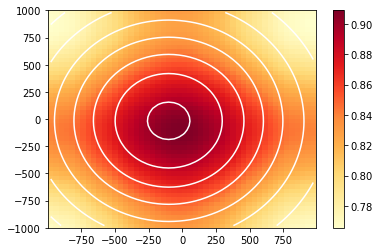

1 (0.8987525369206957+0j)
2 (1.2032169716820275e-08+0j)
3 (5.952505092531771e-05+0j)


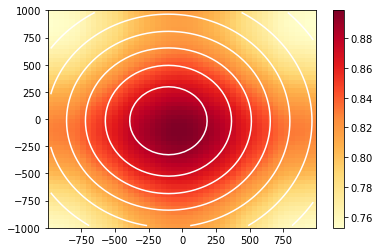

1 (0.8773326719114947+0j)
2 (1.2586501255594167e-08+0j)
3 (7.174012799508972e-05+0j)


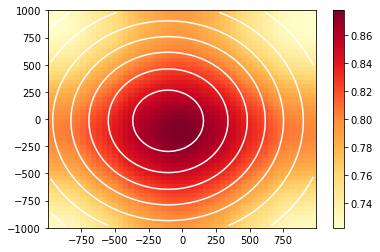

1 (0.8512936533488166+0j)
2 (1.5692219346462488e-08+0j)
3 (8.57422333907532e-05+0j)


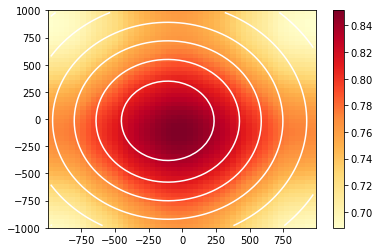

1 (0.8201742787120869+0j)
2 (1.823276829547551e-08+0j)
3 (0.00010175893988248836+0j)


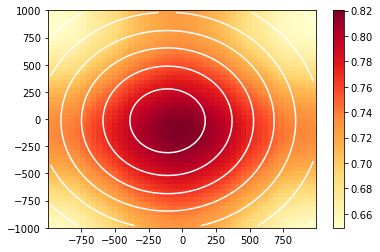

1 (0.7833273564303078+0j)
2 (2.0021336836357112e-08+0j)
3 (0.00012022261648303864+0j)


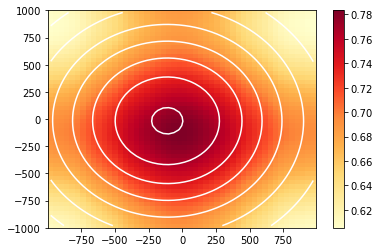

1 (0.7409364085212925+0j)
2 (2.2891404970064674e-08+0j)
3 (0.0001404199129470415+0j)


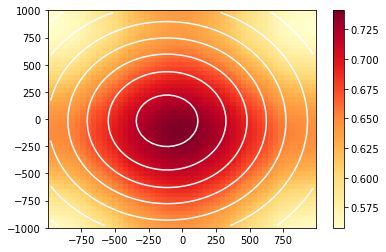

1 (0.6941480194047821+0j)
2 (2.5991461561064247e-08+0j)
3 (0.00016204256514943362+0j)


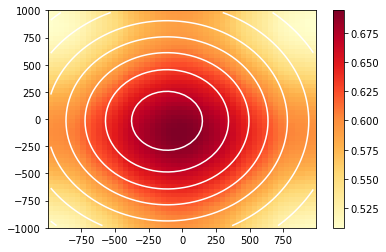

1 (0.642862926130701+0j)
2 (2.7972078147060718e-08+0j)
3 (0.0001851863962463223+0j)


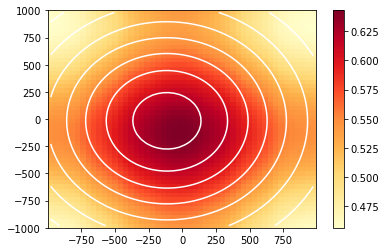

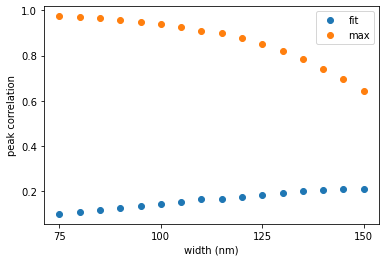

In [7]:
convolveComplex1(dat_fiber, dat, param_list,
                 bound=1000, scale = 1,
                 res=50j, plotflag1 = True,
                 plotflag2=True, fitflag= True,
                 i=0)

In [211]:
convolveComplex1(dat_fiber, dat_fiber, [0],
                 bound=5000, scale = 1,
                 res=150j, plotflag1 = True,
                 plotflag2=True, fitflag= False,
                 i=0)

1 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
2 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
3 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


ValueError: cannot convert float NaN to integer

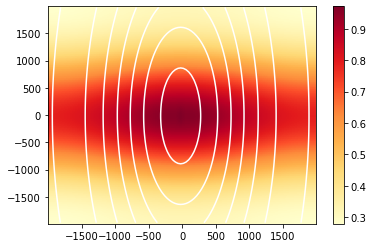

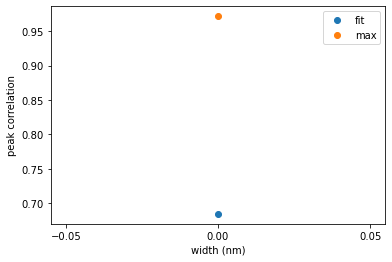

In [ ]:
convolveComplex1(dat[:,:6], dat[:,:6], [0],
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = True,
                 plotflag2=True, fitflag= True,
                 i=0)